# NYC Taxi Data Analysis

In this case study, we are using the data collected by the New York City Taxi and Limousine Commission about "Green" Taxis. Green taxis are the ones that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will be using the data from September 2015.

In [68]:
# Installing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [46]:
# Creating and showing the numbers of rows and columns in the dataframe
taxi_df = pd.read_csv("green_tripdata_2015-09.tar.bz2", compression="bz2")
num_rows, num_columns = taxi_df.shape
print(f"The number of rows: {num_rows}")
print(f"The number of columns: {num_columns}")
taxi_df.head()

The number of rows: 1494926
The number of columns: 21


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


From the above data, we can say that the dataset of the new york city taxi has around **1.5 million records** and **21 features**.

In [47]:
# printing out some general information about the dataset
print(taxi_df.head())
print(taxi_df.info())
print(taxi_df.describe())

   VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0         2  2015-09-01 00:02:34   2015-09-01 00:02:38                  N   
1         2  2015-09-01 00:04:20   2015-09-01 00:04:24                  N   
2         2  2015-09-01 00:01:50   2015-09-01 00:04:24                  N   
3         2  2015-09-01 00:02:36   2015-09-01 00:06:42                  N   
4         2  2015-09-01 00:00:14   2015-09-01 00:04:20                  N   

   RateCodeID  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0           5        -73.979485        40.684956         -73.979431   
1           5        -74.010796        40.912216         -74.010780   
2           1        -73.921410        40.766708         -73.914413   
3           1        -73.921387        40.766678         -73.931427   
4           1        -73.955482        40.714046         -73.944412   

   Dropoff_latitude  Passenger_count  ...  Fare_amount  Extra  MTA_tax  \
0         40.685020                1

We will now create a new column **trip_distance**, which will be in **miles**. The column will be a result of computing the distance on the basis of the latitude and longitude of the pick-up and drop-off location. 
We will be computing the distance using the **Haversine** formula, for which will need the **Math** module.

In [48]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Earth radius in miles
    R = 6371.0
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    
    a = sin(lat_diff/2) ** 2 + cos(lat1) * cos(lat2) * sin(lon_diff/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return distance

# Creating a new column trip_distance
taxi_df['trip_distance'] = taxi_df.apply(
    lambda row: haversine_distance(
        row['Pickup_latitude'], row['Pickup_longitude'],
        row['Dropoff_latitude'], row['Dropoff_longitude']
    ),
    axis = 1
)

taxi_df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,trip_distance
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,0.008502
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,0.001351
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,0.630631
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,1.006215
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,0.936113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494921,1,2015-09-30 23:00:01,2015-09-30 23:17:21,N,1,-73.925339,40.761776,-73.786606,40.770184,1,...,0.5,0.5,0.00,0.0,NaN,0.3,31.80,2,1.0,11.721030
1494922,1,2015-09-30 23:00:05,2015-09-30 23:08:13,N,1,-73.974312,40.685802,-73.980591,40.664055,1,...,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0,2.475518
1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,1,-73.996437,40.681416,-73.998283,40.662296,1,...,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0,2.131660
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,1,-73.953606,40.587482,-73.941071,40.590843,1,...,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0,1.122505


Now that we have created a column **trip_distance**, it is time to create a histogram for the distance.

In [49]:
taxi_df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,trip_distance
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0,0.008502
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,0.001351
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,0.630631
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,1.006215
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,0.936113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494921,1,2015-09-30 23:00:01,2015-09-30 23:17:21,N,1,-73.925339,40.761776,-73.786606,40.770184,1,...,0.5,0.5,0.00,0.0,NaN,0.3,31.80,2,1.0,11.721030
1494922,1,2015-09-30 23:00:05,2015-09-30 23:08:13,N,1,-73.974312,40.685802,-73.980591,40.664055,1,...,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0,2.475518
1494923,1,2015-09-30 23:00:30,2015-09-30 23:08:39,N,1,-73.996437,40.681416,-73.998283,40.662296,1,...,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0,2.131660
1494924,1,2015-09-30 23:00:10,2015-09-30 23:03:49,N,1,-73.953606,40.587482,-73.941071,40.590843,1,...,0.5,0.5,1.25,0.0,NaN,0.3,7.55,1,1.0,1.122505


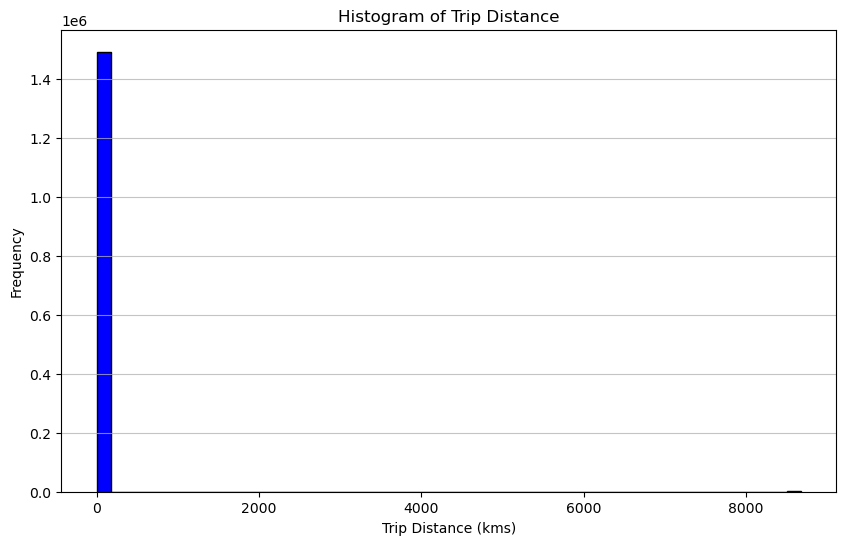

In [50]:
# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(taxi_df['trip_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance (kms)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [51]:
taxi_df = taxi_df.sort_values(by='trip_distance', ascending=False)
taxi_df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,trip_distance
488438,2,2015-09-11 03:12:20,2015-09-11 03:12:22,N,5,0.000000,0.000000,-74.181679,40.687714,0,...,0.0,0.0,23.0,0.0,NaN,0.0,115.00,1,2.0,8681.119008
1085249,1,2015-09-22 14:01:48,2015-09-22 14:02:16,N,5,0.000000,0.000000,-74.094513,40.703007,1,...,0.0,0.0,0.0,0.0,NaN,0.0,67.00,1,2.0,8674.203101
641032,1,2015-09-13 15:44:02,2015-09-13 15:44:02,N,5,-74.064804,40.740108,0.000000,0.000000,3,...,0.0,0.0,0.0,0.0,NaN,0.0,0.00,2,1.0,8672.496438
981866,2,2015-09-20 04:19:55,2015-09-20 04:19:57,N,5,0.000000,0.000000,-74.063965,40.722149,1,...,0.0,0.0,0.0,0.0,NaN,0.0,15.00,1,2.0,8672.061148
62477,2,2015-09-02 15:18:24,2015-09-02 15:23:19,N,5,-74.039993,40.708504,0.000000,0.000000,2,...,0.0,0.0,0.0,0.0,NaN,0.0,0.15,2,1.0,8669.796968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484270,1,2015-09-30 19:38:03,2015-09-30 19:38:08,N,1,-73.945450,40.751488,-73.945450,40.751488,1,...,1.0,0.5,0.0,0.0,NaN,0.0,4.00,2,1.0,0.000000
669154,1,2015-09-14 06:01:06,2015-09-14 06:01:11,N,1,-73.926849,40.864979,-73.926849,40.864979,1,...,0.0,0.5,0.0,0.0,NaN,0.3,3.30,3,1.0,0.000000
669124,1,2015-09-14 06:15:40,2015-09-14 06:15:45,N,1,-73.875771,40.749390,-73.875771,40.749390,1,...,1.0,0.5,0.0,0.0,NaN,0.3,4.30,3,1.0,0.000000
163110,2,2015-09-04 17:04:03,2015-09-04 17:28:15,N,1,0.000000,0.000000,0.000000,0.000000,5,...,1.0,0.5,0.0,0.0,NaN,0.3,16.30,2,1.0,0.000000


Here, we can see that for some trips the coordinates for the **pick-up** and **drop-off** points are **zero** which is why we can see some extreme values in the histogram. Now, we cannot simply fill these values with the mean since they indicate locations. But before dropping the columns, we will count how many null values are there in the columns.

In [52]:
# Counting null values in Pickup and drop off latitudes and longitudes
pickup_latitude_null_count = (taxi_df['Pickup_latitude'] == 0.000000).sum()
pickup_longitude_null_count = (taxi_df['Pickup_longitude'] == 0.000000).sum()
dropoff_latitude_null_count = (taxi_df['Dropoff_latitude'] == 0.000000).sum()
dropoff_longitude_null_count = (taxi_df['Dropoff_longitude'] == 0.000000).sum()

print(f'Null values in pickup latitude columns: {pickup_latitude_null_count}')
print(f'Null values in pickup longitude columns: {pickup_longitude_null_count}')
print(f'Null values in dropoff latitude columns: {dropoff_latitude_null_count}')
print(f'Null values in dropoff longitude columns: {dropoff_longitude_null_count}')


Null values in pickup latitude columns: 2110
Null values in pickup longitude columns: 2110
Null values in dropoff latitude columns: 1963
Null values in dropoff longitude columns: 1963


In [54]:
condition = (taxi_df == 0.000000).any(axis=1)

taxi_df = taxi_df[~condition]

# Display the modified DataFrame
taxi_df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,trip_distance
186089,2,2015-09-04 23:02:18,2015-09-05 00:06:52,N,4,-73.970016,40.806499,-73.597694,41.160912,2,...,0.5,0.5,38.77,2.54,NaN,0.3,232.61,1,1.0,50.297023
74429,2,2015-09-02 19:28:59,2015-09-02 20:56:46,N,1,-73.955818,41.099949,-73.927391,40.651253,1,...,1.0,0.5,32.46,5.54,NaN,0.3,162.30,1,1.0,49.949949
889321,1,2015-09-18 21:43:40,2015-09-18 22:50:31,N,4,-73.844482,40.757710,-73.472672,41.092010,2,...,0.5,0.5,36.15,5.54,NaN,0.3,216.99,1,1.0,48.555065
737553,2,2015-09-15 21:16:06,2015-09-15 22:35:24,N,4,-73.844070,40.756901,-74.410652,40.687893,1,...,0.5,0.5,39.72,15.29,NaN,0.3,238.31,1,1.0,48.359727
746822,2,2015-09-16 02:17:57,2015-09-16 03:06:24,N,1,-73.911224,40.840981,-73.354195,40.760277,1,...,0.5,0.5,3.00,5.54,NaN,0.3,110.34,1,1.0,47.737934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132478,2,2015-09-03 23:12:20,2015-09-04 00:02:32,N,1,-73.994720,40.684784,-73.994698,40.684937,1,...,0.5,0.5,12.71,5.54,NaN,0.3,63.55,1,1.0,0.017076
1428678,2,2015-09-29 16:23:37,2015-09-29 18:20:24,N,1,-73.939575,40.847485,-73.939713,40.847580,1,...,1.0,0.5,42.71,11.08,NaN,0.3,185.09,1,1.0,0.015681
1168734,2,2015-09-24 16:08:48,2015-09-24 16:51:30,N,1,-73.944901,40.803524,-73.945045,40.803497,1,...,1.0,0.5,12.84,5.54,NaN,0.3,64.18,1,1.0,0.012557
460018,2,2015-09-10 16:59:29,2015-09-10 19:59:48,N,1,-73.924896,40.627121,-73.924881,40.627056,5,...,1.0,0.5,20.49,17.29,NaN,0.3,157.08,1,1.0,0.007325


In [55]:
# checking if there are null values present
pickup_latitude_null_count = (taxi_df['Pickup_latitude'] == 0.000000).sum()
pickup_longitude_null_count = (taxi_df['Pickup_longitude'] == 0.000000).sum()
dropoff_latitude_null_count = (taxi_df['Dropoff_latitude'] == 0.000000).sum()
dropoff_longitude_null_count = (taxi_df['Dropoff_longitude'] == 0.000000).sum()

print(f'Null values in pickup latitude columns: {pickup_latitude_null_count}')
print(f'Null values in pickup longitude columns: {pickup_longitude_null_count}')
print(f'Null values in dropoff latitude columns: {dropoff_latitude_null_count}')
print(f'Null values in dropoff longitude columns: {dropoff_longitude_null_count}')

Null values in pickup latitude columns: 0
Null values in pickup longitude columns: 0
Null values in dropoff latitude columns: 0
Null values in dropoff longitude columns: 0


Now, since there are no null values left in the pickup and dropoff location coordinates, we will again create the histogram.

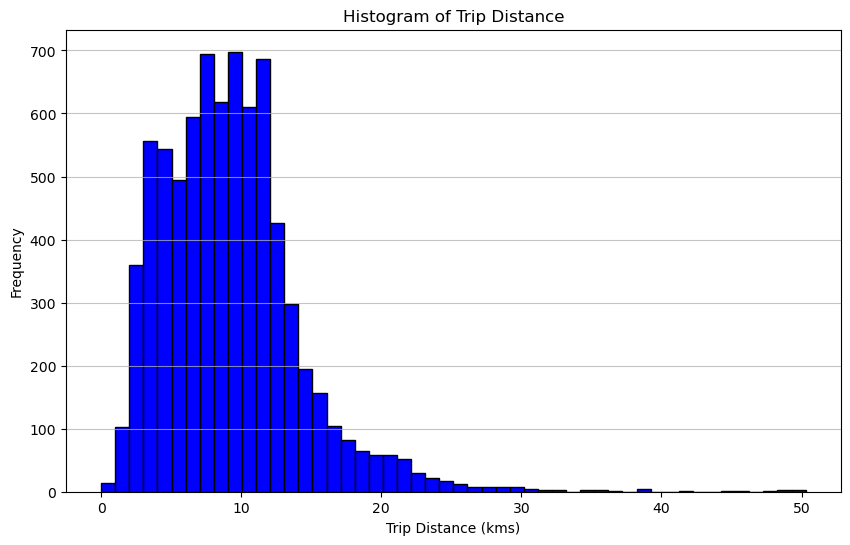

In [60]:
# Creating a histogram
plt.figure(figsize=(10, 6))
plt.hist(taxi_df['trip_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance (kms)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

After modifying the dataframe and eliminating the null value, we get a right skewed histogram, which means that most of the trips have a distance ranging from **5 to 15 kms** with very few off them more than **25 kms**.

#### Moving on, we will now work on the following analysis:
- Mean and median trip distance grouped by hour of day
- Trips originating from the NYC airports

In [61]:
# grouping the data by hour of day
taxi_df['lpep_pickup_datetime'] = pd.to_datetime(taxi_df['lpep_pickup_datetime'])
taxi_df['hour_of_day'] = taxi_df['lpep_pickup_datetime'].dt.hour

# grouping the data calculating mean and median trip distance
trip_distance_stats = taxi_df.groupby('hour_of_day')['trip_distance'].agg(['mean', 'median'])

# displaying results
print(trip_distance_stats)

                  mean     median
hour_of_day                      
0            10.077529  10.037585
1             9.203004   8.437190
2             9.508401   8.271626
3             9.049169   8.491206
4             9.118578   8.385980
5             8.391060   7.820164
6             8.586216   8.394819
7             9.436184   9.436184
8             7.449629   7.039054
9             9.009913   9.009913
10           26.965787  26.965787
11            2.834776   2.834776
12            5.619184   5.619184
13            7.459330   7.343897
14           13.007623  10.011595
15            9.667445   8.330187
16            8.437597   7.910080
17            8.576581   7.787629
18            8.610361   7.864356
19            8.665514   7.881870
20            8.607953   8.129584
21            9.621704   9.669224
22           10.051255  10.223572
23            9.753090   9.794858


C:\Users\Admin\AppData\Local\Temp\ipykernel_20388\3898029659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['lpep_pickup_datetime'] = pd.to_datetime(taxi_df['lpep_pickup_datetime'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_20388\3898029659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['hour_of_day'] = taxi_df['lpep_pickup_datetime'].dt.hour


<Figure size 1000x600 with 0 Axes>

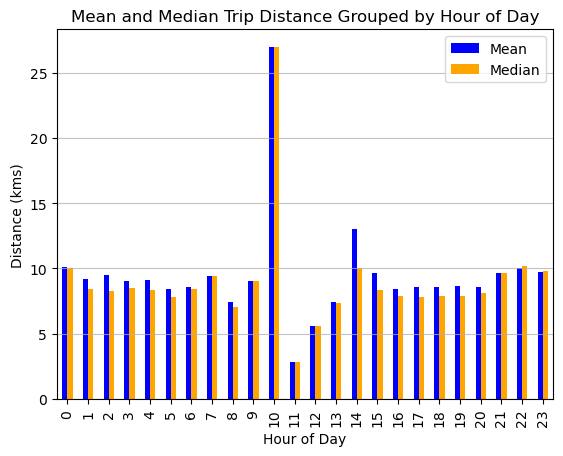

In [62]:
# plotting the data as a bar graph
plt.figure(figsize=(10, 6))
trip_distance_stats.plot(kind='bar', y=['mean', 'median'], color=['blue', 'orange'])
plt.title('Mean and Median Trip Distance Grouped by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Distance (kms)')
plt.legend(['Mean', 'Median'])
plt.grid(axis='y', alpha=0.75)
plt.show()

By visualizing the data, we can easily determine that the most number of trips take place at **10 am**.

We will now analyze the trips originating/ending from/at the NYC airports **JFK and LGA**

#### JFK Trips

In [65]:
# Analyzing trips originating from JFK
jfk_coordinates = {'latitude': 40.641311, 'longitude': -73.778139}

# creating a function to check if trip is to/from JFK
def is_jfk_trip(row):
    jfk_pickup_distance = haversine_distance(row['Pickup_latitude'], row['Pickup_longitude'], jfk_coordinates['latitude'], jfk_coordinates['longitude'])
    jfk_dropoff_distance = haversine_distance(row['Dropoff_latitude'], row['Dropoff_longitude'], jfk_coordinates['latitude'], jfk_coordinates['longitude'])
    return (jfk_pickup_distance < 2.0) or (jfk_dropoff_distance < 2.0)

# Applying the function to create a new column 'is_jfk_trip'
taxi_df['is_jfk_trip'] = taxi_df.apply(is_jfk_trip, axis=1)

# Filtering to include only trips to/from JFK
jfk_trips = taxi_df[taxi_df['is_jfk_trip']]

# Displaying count, and average fare
jfk_trip_stats = {
    'count':jfk_trips.shape[0],
    'average_fare(dollars)':round(jfk_trips['Total_amount'].mean(), 2)
}

print('Trips to/from JFK airport: ')
print(jfk_trip_stats)

Trips to/from JFK airport: 
{'count': 44, 'average_fare(dollars)': 74.3}


C:\Users\Admin\AppData\Local\Temp\ipykernel_20388\1757650567.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['is_jfk_trip'] = taxi_df.apply(is_jfk_trip, axis=1)


#### LGA Trips

In [66]:
# Analyzing trips originating from JFK
lga_coordinates = {'latitude': 40.776927, 'longitude': -73.873966}

# creating a function to check if trip is to/from JFK
def is_lga_trip(row):
    lga_pickup_distance = haversine_distance(row['Pickup_latitude'], row['Pickup_longitude'], lga_coordinates['latitude'], lga_coordinates['longitude'])
    lga_dropoff_distance = haversine_distance(row['Dropoff_latitude'], row['Dropoff_longitude'], lga_coordinates['latitude'], lga_coordinates['longitude'])
    return (lga_pickup_distance < 2.0) or (lga_dropoff_distance < 2.0)

# Applying the function to create a new column 'is_jfk_trip'
taxi_df['is_lga_trip'] = taxi_df.apply(is_lga_trip, axis=1)

# Filtering to include only trips to/from JFK
lga_trips = taxi_df[taxi_df['is_lga_trip']]

# Displaying count, and average fare
lga_trip_stats = {
    'count':lga_trips.shape[0],
    'average_fare(dollars)':round(lga_trips['Total_amount'].mean(), 2)
}

print('Trips to/from LGA airport: ')
print(lga_trip_stats)

Trips to/from LGA airport: 
{'count': 968, 'average_fare(dollars)': 39.56}


C:\Users\Admin\AppData\Local\Temp\ipykernel_20388\3758445255.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['is_lga_trip'] = taxi_df.apply(is_lga_trip, axis=1)


We will now perform the following analyses:
- Creating a derived variable representing the average speed over the course of the trip
- building up a hypothesis of average trip speed as a function of time of day

#### Build a derived variable representing the average speed over the course of a trip

In [72]:
taxi_df['lpep_pickup_datetime'] = pd.to_datetime(taxi_df['lpep_pickup_datetime'])
taxi_df['lpep_dropoff_datetime'] = pd.to_datetime(taxi_df['Lpep_dropoff_datetime'])

# Calculating trip duration in hours
taxi_df['trip_duration'] = (taxi_df['lpep_dropoff_datetime'] - taxi_df['lpep_pickup_datetime']).dt.total_seconds()

# Calculating average speed (trip_distance / trip_duration)
taxi_df['average_speed'] = taxi_df['trip_distance'] / (taxi_df['trip_duration']/3600)

#displaying the dataframe with new variable
print(taxi_df[['trip_distance', 'trip_duration', 'average_speed']])

         trip_distance  trip_duration  average_speed
186089       50.297023         3874.0      46.739619
74429        49.949949         5267.0      34.140842
889321       48.555065         4011.0      43.579714
737553       48.359727         4758.0      36.589958
746822       47.737934         2907.0      59.118185
...                ...            ...            ...
132478        0.017076         3012.0       0.020410
1428678       0.015681         7007.0       0.008056
1168734       0.012557         2562.0       0.017645
460018        0.007325        10819.0       0.002437
871454        0.004432         1110.0       0.014374

[7604 rows x 3 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_20388\2001334900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['lpep_pickup_datetime'] = pd.to_datetime(taxi_df['lpep_pickup_datetime'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_20388\2001334900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['lpep_dropoff_datetime'] = pd.to_datetime(taxi_df['Lpep_dropoff_datetime'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_20388\2001334900.py:5: SettingWithCopyWarning: 
A value is trying to be set 

#### Build up a hypothesis of average trip speed as a function of time of day

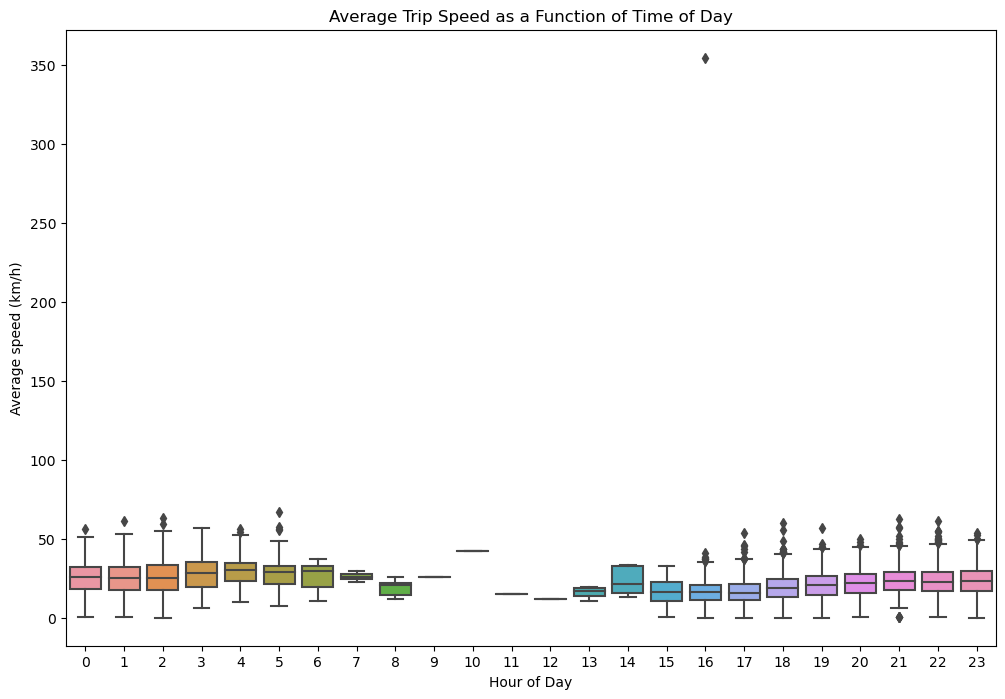

In [77]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x=taxi_df['lpep_pickup_datetime'].dt.hour, y=taxi_df['average_speed'])
plt.title('Average Trip Speed as a Function of Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average speed (km/h)')
plt.show()

As we saw earlier, the trip distance is the maximum at 10am in the morning, which also tells us why the median average speed is the maximum for **10am**. For the remaining hours of the day, we can say that the median speed is around **25 to 30 km/h**